### 

## 8.3. Zero-order methods.

### №1.

Для решения задачи будем использовать **алгоритм имитации отжига**.

In [11]:
# Импортируем необходимые библиотеки
import numpy as np
import jax.numpy as jnp
from scipy.spatial import distance_matrix
import random

# Функция для генерации случайной симметричной задачи коммивояжера
def generate_random_symmetric_tsp(num_cities, seed=0):
    np.random.seed(seed)  # Устанавливаем seed для воспроизводимости результатов
    points = np.random.rand(num_cities, 2)  # Генерируем случайные координаты
    dist_matrix = distance_matrix(points, points)  # Считаем матрицу расстояний между городами
    dist_matrix = (dist_matrix + dist_matrix.T) / 2  # Обеспечиваем симметрию матрицы расстояний
    return jnp.array(dist_matrix), points  # Конвертируем матрицу в JAX массив для дальнейшей обработки

# Функция для подсчета общего расстояния по данному порядку городов
def calculate_total_distance(order, dist_matrix):
    return sum(dist_matrix[order[i-1]][order[i]] for i in range(len(order)))

def simulated_annealing(dist_matrix, temp=1000, cooling_rate=0.995, Tmin=1e-17):
    """Функция алгоритма имитации отжига"""
    num_cities = len(dist_matrix)
    current_order = list(range(num_cities))  # начальный порядрок
    current_distance = calculate_total_distance(current_order, dist_matrix)  # общее расстояния для начального порядка

    best_order = current_order[:]  # лучший порядок
    best_distance = current_distance  # лучшее расстояние

    # Цикл до тех пор, пока температура не станет меньше чем Tmin
    while temp > Tmin:
        temp *= cooling_rate  # понижаем температуру на каждой итерации

        # Генерируем новый порядок, меняя местами два рандомных города
        # Менем только два, не сильно меняя порядок, т.к. каждое последующее приблежение сильно отличаться не должно
        # https://fmin.xyz/docs/methods/zom/simulated-annealing.html
        new_order = current_order[:]
        i, j = random.sample(range(num_cities), 2)
        new_order[i], new_order[j] = new_order[j], new_order[i]

        # Считаем новое расстояние
        new_distance = calculate_total_distance(new_order, dist_matrix)

        # Если новый порядок лучше, принимаем его
        if new_distance < current_distance:
            current_order, current_distance = new_order, new_distance
            if new_distance < best_distance:
                best_order, best_distance = new_order, new_distance
        # Если новый порядок хуже, принимаем его с определенной вероятностью
        elif random.random() < np.exp((current_distance - new_distance) / temp):
            current_order, current_distance = new_order, new_distance

    return best_order, best_distance


num_cities = 20
dist_matrix, points = generate_random_symmetric_tsp(num_cities) 
best_order, best_distance = simulated_annealing(dist_matrix)
print(f"Best order: {best_order}")
print(f"Best distance: {best_distance}")

Best order: [4, 19, 10, 9, 6, 3, 11, 0, 18, 1, 16, 2, 15, 13, 8, 12, 17, 7, 14, 5]
Best distance: 4.137814044952393


Визуализация решения TSP.

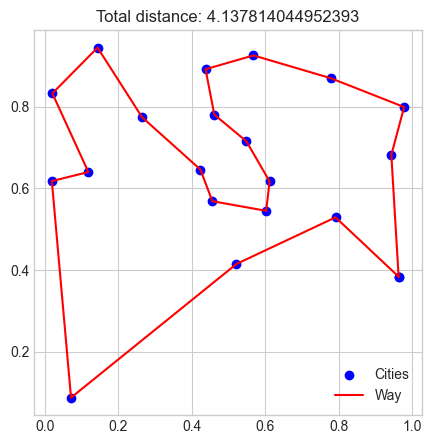

In [12]:
import matplotlib.pyplot as plt

# Функция для отображения решения задачи коммивояжера
def plot_tsp_solution(points, order, best_distance):
    # Создаем отображаемый порядок точек
    ordered_points = points[order + [order[0]]]

    # Рисуем график
    plt.figure(figsize=(5, 5))
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.scatter(ordered_points[:, 0], ordered_points[:, 1], color='blue', label='Cities')  # Рисуем точки
    plt.plot(ordered_points[:, 0], ordered_points[:, 1], color='red', label='Way')  # Рисуем линии между точками
    plt.title(f"Total distance: {best_distance}")
    plt.legend()
    plt.show()


plot_tsp_solution(points, best_order, best_distance)

**<u>Ответ:</u>** задача коммивояжёра решена с помощью метода имитации отжига.

P.S. https://github.com/zabara-id/OptimizationMethodsMIPT/tree/master/Autumn  - ссылка на мой GitHub, в котором лежат ноутбуки с моим кодом для задач этого задания (8-ая папка)